# Thao tác hình ảnh cơ bản

Trong sổ tay này, mình sẽ trình bày cách thực hiện chuyển đổi hình ảnh bao gồm:
* Truy cập và thao tác pixel hình ảnh
* Thay đổi kích thước hình ảnh
* Cắt
* Lật

In [14]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

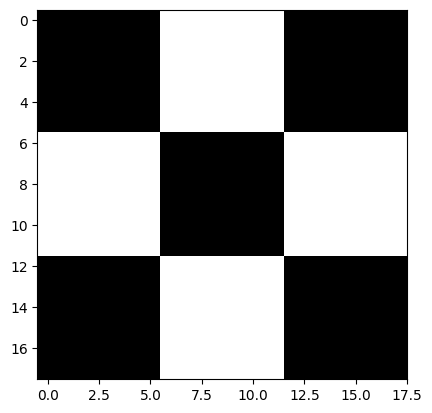

In [15]:
# Đọc hình ảnh theo thang độ xám.
cb_img = cv2.imread("image/checkerboard_18x18.png", 0)

# Đặt bản đồ màu theo thang độ xám để hiển thị đúng.
plt.imshow(cb_img, cmap="gray")
print(cb_img)

## Truy cập từng điểm ảnh riêng lẻ

Chúng ta hãy xem cách truy cập một điểm ảnh trong hình ảnh.

Để truy cập bất kỳ điểm ảnh nào trong ma trận numpy, bạn phải sử dụng ký hiệu ma trận như matrix[r,c], trong đó r là số hàng và c là số cột. Ngoài ra, lưu ý rằng ma trận được lập chỉ mục 0.

Ví dụ, nếu bạn muốn truy cập điểm ảnh đầu tiên, bạn cần chỉ định matrix[0,0]. Chúng ta hãy xem một số ví dụ. Chúng ta sẽ in một điểm ảnh màu đen từ trên cùng bên trái và một điểm ảnh màu trắng từ trên cùng ở giữa.

In [16]:
# in điểm ảnh đầu tiên của hộp đen đầu tiên
print(cb_img[0, 0])
# in điểm ảnh màu trắng đầu tiên bên phải hộp đen đầu tiên
print(cb_img[0, 6])

0
255


## Sửa đổi điểm ảnh của hình ảnh

Chúng ta có thể sửa đổi giá trị cường độ của điểm ảnh theo cùng cách như mô tả ở trên.

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

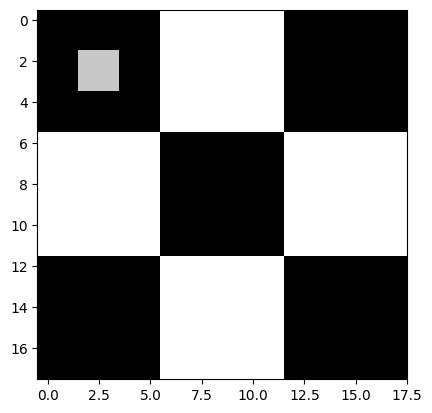

In [17]:
cb_img_copy = cb_img.copy()
cb_img_copy[2, 2] = 200
cb_img_copy[2, 3] = 200
cb_img_copy[3, 2] = 200
cb_img_copy[3, 3] = 200

# Giống như trên
# cb_img_copy[2:3,2:3] = 200

plt.imshow(cb_img_copy, cmap="gray")
print(cb_img_copy)

## Cắt ảnh

Cắt ảnh chỉ đơn giản bằng cách chọn một vùng (pixel) cụ thể của ảnh.

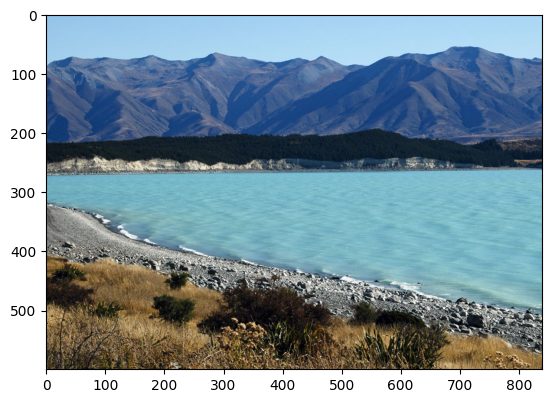

In [18]:
img_NZ_bgr = cv2.imread("image/New_Zealand_Lake.jpg", cv2.IMREAD_COLOR)
img_NZ_rgb = img_NZ_bgr[:, :, ::-1]

plt.imshow(img_NZ_rgb)

### Cắt bỏ phần giữa của hình ảnh

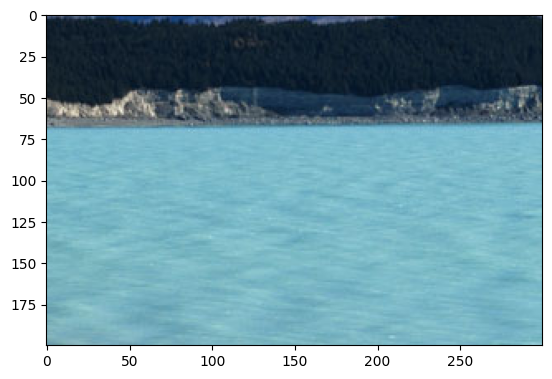

In [19]:
cropped_region = img_NZ_rgb[200:400, 300:600]
plt.imshow(cropped_region)

## Thay đổi kích thước hình ảnh


Hàm **`resize`** thay đổi kích thước hình ảnh `src` xuống hoặc lên đến kích thước đã chỉ định. Kích thước và kiểu được lấy từ `src`,`dsize`,`fx` và `fy`.

### Cú pháp hàm

``` python
dst = resize(src, dsize[, dst[, fx[, fy[, interpolation]]]])
```

`dst`: hình ảnh đầu ra; có kích thước dsize (khi khác không) hoặc kích thước được tính từ src.size(), fx và fy; kiểu dst giống với src.

Hàm có **2 đối số bắt buộc**:

1. `src`: hình ảnh đầu vào

2. `dsize`: kích thước hình ảnh đầu ra

Các đối số tùy chọn thường được sử dụng bao gồm:

1. `fx`: Hệ số tỷ lệ dọc theo trục ngang; khi bằng 0, nó được tính là (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚠𝚒𝚍𝚝𝚑/𝚜𝚛𝚌.𝚌𝚘𝚕𝚜

2. `fy`: Hệ số tỷ lệ dọc theo trục dọc; khi bằng 0, nó được tính là (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚑𝚎𝚒𝚐𝚑𝚝/𝚜𝚛𝚌.𝚛𝚘𝚠𝚜

Hình ảnh đầu ra có kích thước `dsize` (khi nó khác không) hoặc kích thước được tính từ `src.size()`, `fx` và `fy`; kiểu dst giống như của src.

### Tài liệu OpenCV

**`resize()`**: <a href="https://docs.opencv.org/4.5.0/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d" target="_blank">Liên kết tài liệu</a>

### Phương pháp 1: Chỉ định Hệ số tỷ lệ bằng cách sử dụng fx và fy

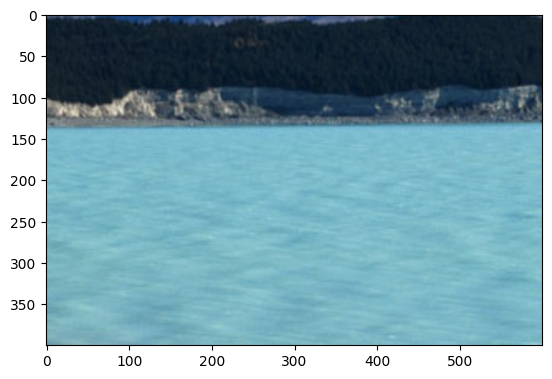

In [20]:
resized_cropped_region_2x = cv2.resize(cropped_region, None, fx=2, fy=2)
plt.imshow(resized_cropped_region_2x)

### Phương pháp 2: Chỉ định kích thước chính xác của hình ảnh đầu ra

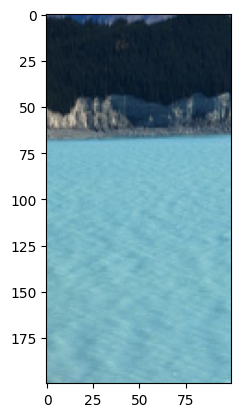

In [21]:
desired_width = 100
desired_height = 200
dim = (desired_width, desired_height)

# Thay đổi kích thước hình nền thành cùng kích thước với hình ảnh logo
resized_cropped_region = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

### Thay đổi kích thước trong khi vẫn giữ nguyên tỷ lệ khung hình

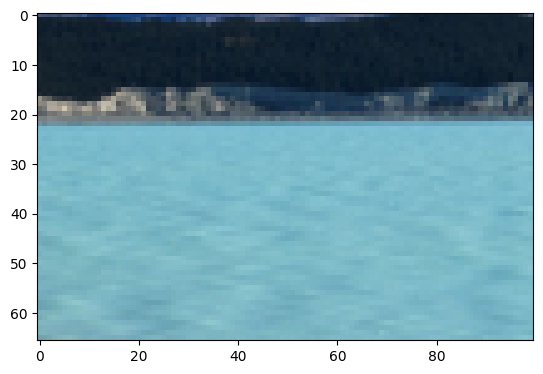

In [22]:
# Phương pháp 2: Sử dụng 'dsize'
desired_width = 100
aspect_ratio = desired_width / cropped_region.shape[1]
desired_height = int(cropped_region.shape[0] * aspect_ratio)
dim = (desired_width, desired_height)

# Thay đổi kích thước hình ảnh
resized_cropped_region = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

### Chúng ta hãy thực sự hiển thị hình ảnh đã được thay đổi kích thước (đã cắt)

In [23]:
# Đổi thứ tự kênh
resized_cropped_region_2x = resized_cropped_region_2x[:, :, ::-1]

# Lưu hình ảnh đã thay đổi kích thước vào đĩa
cv2.imwrite("image/resized_cropped_region_2x.png", resized_cropped_region_2x)

# Hiển thị hình ảnh đã cắt và đã thay đổi kích thước
Image(filename="resized_cropped_region_2x.png")

FileNotFoundError: [Errno 2] No such file or directory: 'resized_cropped_region_2x.png'

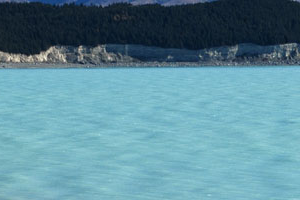

In [ ]:
# Đổi thứ tự kênh
cropped_region = cropped_region[:, :, ::-1]

# Lưu 'region' đã cắt
cv2.imwrite("image/cropped_region.png", cropped_region)

# Hiển thị hình ảnh đã cắt và thay đổi kích thước
Image(filename="cropped_region.png")

## Lật hình ảnh


Hàm **`flip`** lật mảng theo một trong ba cách khác nhau (chỉ số hàng và cột dựa trên 0):

### Cú pháp hàm
``` python
dst = cv.flip(src, flipCode )
```

`dst`: mảng đầu ra có cùng kích thước và kiểu với src.

Hàm có **2 đối số bắt buộc**:

1. `src`: hình ảnh đầu vào
2. `flipCode`: cờ để chỉ định cách lật mảng; 0 có nghĩa là lật quanh trục x và giá trị dương (ví dụ: 1) có nghĩa là lật quanh trục y. Giá trị âm (ví dụ: -1) có nghĩa là lật quanh cả hai trục.

### Tài liệu OpenCV

**`flip`**: <a href="https://docs.opencv.org/4.5.0/d2/de8/group__core__array.html#gaca7be533e3dac7feb70fc60635adf441" target="_blank">Liên kết tài liệu</a>

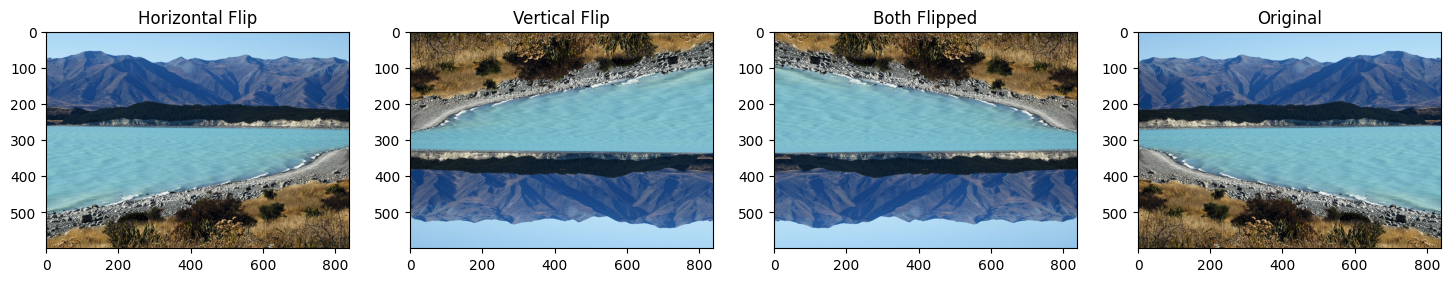

In [ ]:
img_NZ_rgb_flipped_horz = cv2.flip(img_NZ_rgb, 1)
img_NZ_rgb_flipped_vert = cv2.flip(img_NZ_rgb, 0)
img_NZ_rgb_flipped_both = cv2.flip(img_NZ_rgb, -1)

# Hiển thị ảnh
plt.figure(figsize=(18, 5))
plt.subplot(141);plt.imshow(img_NZ_rgb_flipped_horz);plt.title("Horizontal Flip");
plt.subplot(142);plt.imshow(img_NZ_rgb_flipped_vert);plt.title("Vertical Flip");
plt.subplot(143);plt.imshow(img_NZ_rgb_flipped_both);plt.title("Both Flipped");
plt.subplot(144);plt.imshow(img_NZ_rgb);plt.title("Original");
